In [5]:
# 베이스 추정에 의한 회귀 분석
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
#파라미터 설정
beta_true = 1.0 / (0.3) ** 2
alpha = 1.0 / 100 ** 2
M = 9  # 다항식 차수
N_list = [4, 5, 10, 100]
beta = beta_true

In [7]:
# 트레이닝 셋 {x_n,y_n} (n=1...N) 을 준비
def generate_training_set(num):
    dataset = pd.DataFrame(columns=["x", "y"])
    for idx in range(num):
        x = float(idx) / float(num - 1)
        y = np.sin(2.0 * np.pi * x) + np.random.normal(scale=0.3)
        dataset = dataset.append(pd.Series([x, y], index=["x", "y"]), ignore_index=True)
    return dataset

# 평균 m(x)
# phi.T: (size=(1,M+1))
# S: (size=(M+1,M+1))
# sigma_t_phi: (size=(M+1,1))
def mean_fun(x):
    t = training_set.y
    phi_x = np.array([x ** i for i in range(0, m + 1)])
    sigma_t_phi= np.sum(np.multiply(t.values[:,np.newaxis],phis.values),axis = 0)
    #TODO flatten지웠는데 괜찮을까?
    # m_x = np.linalg.multi_dot([beta*phi_x.T, s, sum]).flatten()
    m_x = np.linalg.multi_dot([beta*phi_x.T, s, sigma_t_phi]).flatten()
    return m_x

# TODO: 분산이 계산된거니 표준편차로 바꿔서 대입시키기
def deviation_fun(x):
    phi_x = pd.DataFrame([x ** i for i in range(0, m + 1)])
    variance = 1.0 / beta + np.linalg.multi_dot([phi_x.T, s, phi_x])
    # TODO diagonal()제거 했는데 괜찮을지 확인하기
    # return variance.diagonal()

    return np.sqrt(variance).diagonal()

# TODO: 분산이 계산된거니 표준편차로 바꿔서 대입시키기
def variance_fun(x):
    phi_x = pd.DataFrame([x ** i for i in range(0, m + 1)])
    variance = 1.0 / beta + np.linalg.multi_dot([phi_x.T, s, phi_x])
    # TODO diagonal()제거 했는데 괜찮을지 확인하기
    # return variance.diagonal()
    return variance

<ipython-input-7-dcc96ab620f7>:30: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(variance).diagonal()
<ipython-input-7-dcc96ab620f7>:30: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(variance).diagonal()
<ipython-input-9-35d1a1887c8e>:72: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return np.multiply(ws[:,np.newaxis],x_n).sum(axis = 0)
<ipython-input-9-35d1a1887c8e>:72: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return np.multiply(ws[:,np.newaxis],x_n).sum(axis = 0)
<ipython-input-9-35d1a1887c8e>:72: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexin

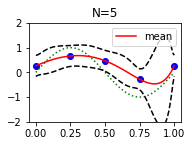

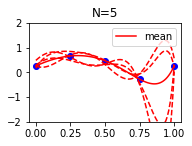

In [9]:
m = 9
N = 5
idx = 0
training_set = generate_training_set(N)
t = training_set.y
c = 0

phis = pd.DataFrame() # (size=(N,M+1))
for i in range(0, m + 1):
    p = training_set.x ** i
    p.name = "x**%d" % i
    phis = pd.concat([phis, p], axis=1)

# 분산(S) 계산
phiphi_sum = 0

for _, phi in phis.iterrows():
    phi = phi.values[:,np.newaxis] # reshape the phi (M+1,) to (M+1,1)
    phiphi_sum += np.dot(phi,phi.T) # (size=(M+1,M+1))
s_inv = alpha * pd.DataFrame(np.identity(m + 1)) + beta * phiphi_sum
s = np.linalg.inv(s_inv)  # 사후분포의 공분산행렬

sigma_t_phi= np.sum(np.multiply(t.values[:,np.newaxis],phis.values),axis = 0)
mean = np.linalg.multi_dot([beta*s,sigma_t_phi])

# Main
fig1 = plt.figure()
fig2 = plt.figure()

df_ws = pd.DataFrame()
ws_samples = pd.DataFrame(np.random.multivariate_normal(mean,s,4))

subplot1 = fig1.add_subplot(2,2,c+1)
subplot1.set_xlim(-0.05,1.05)
subplot1.set_ylim(-2,2)
subplot1.set_title("N=%d" % N)

subplot2 = fig2.add_subplot(2,2,c+1)
subplot2.set_xlim(-0.05,1.05)
subplot2.set_ylim(-2,2)
subplot2.set_title("N=%d" % N)

# 트레이닝 셋 표시
subplot1.scatter(training_set.x, training_set.y, marker='o', color='blue')
subplot2.scatter(training_set.x, training_set.y, marker='o', color='blue')

linex = np.arange(0,1.01,0.01)

# 실제값 표시
liney = np.sin(2*np.pi*linex)
subplot1.plot(linex, liney, color='green',linestyle=':')

# 평균과 표준편차 곡선 표시
mu = np.array(mean_fun(linex))
d = np.array(deviation_fun(linex))
subplot1.plot(linex, mu, color='red', label='mean')
subplot1.legend(loc=1)
subplot1.plot(linex, mu - d, color='black', linestyle='--')
subplot1.plot(linex, mu + d, color='black', linestyle='--')

# 다항식의 샘플 표시
mu = np.array(mean_fun(linex))
d = np.array(deviation_fun(linex))
liney = mu
subplot2.plot(linex, liney, color='red', label="mean")
subplot2.legend(loc=1)

def f(x,ws):
    # x : (size=(n,1))
    # ws : (size=(M+1))
    x_n = np.array([x ** i for i in range(0, m + 1)])
    return np.multiply(ws[:,np.newaxis],x_n).sum(axis = 0)

for index, ws in ws_samples.iterrows():
    liney = f(linex, ws)
    subplot2.plot(linex, liney, color='red', linestyle='--')

fig1.show()
fig2.show()